In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [3]:
df=pd.read_csv('heart_failure.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.shape

(299, 13)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df1=df.copy()
df2=df1.copy()

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df.rename(columns={'sex':'gender','DEATH_EVENT':'death','high_blood_pressure':'high_bp'},inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_bp,platelets,serum_creatinine,serum_sodium,gender,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


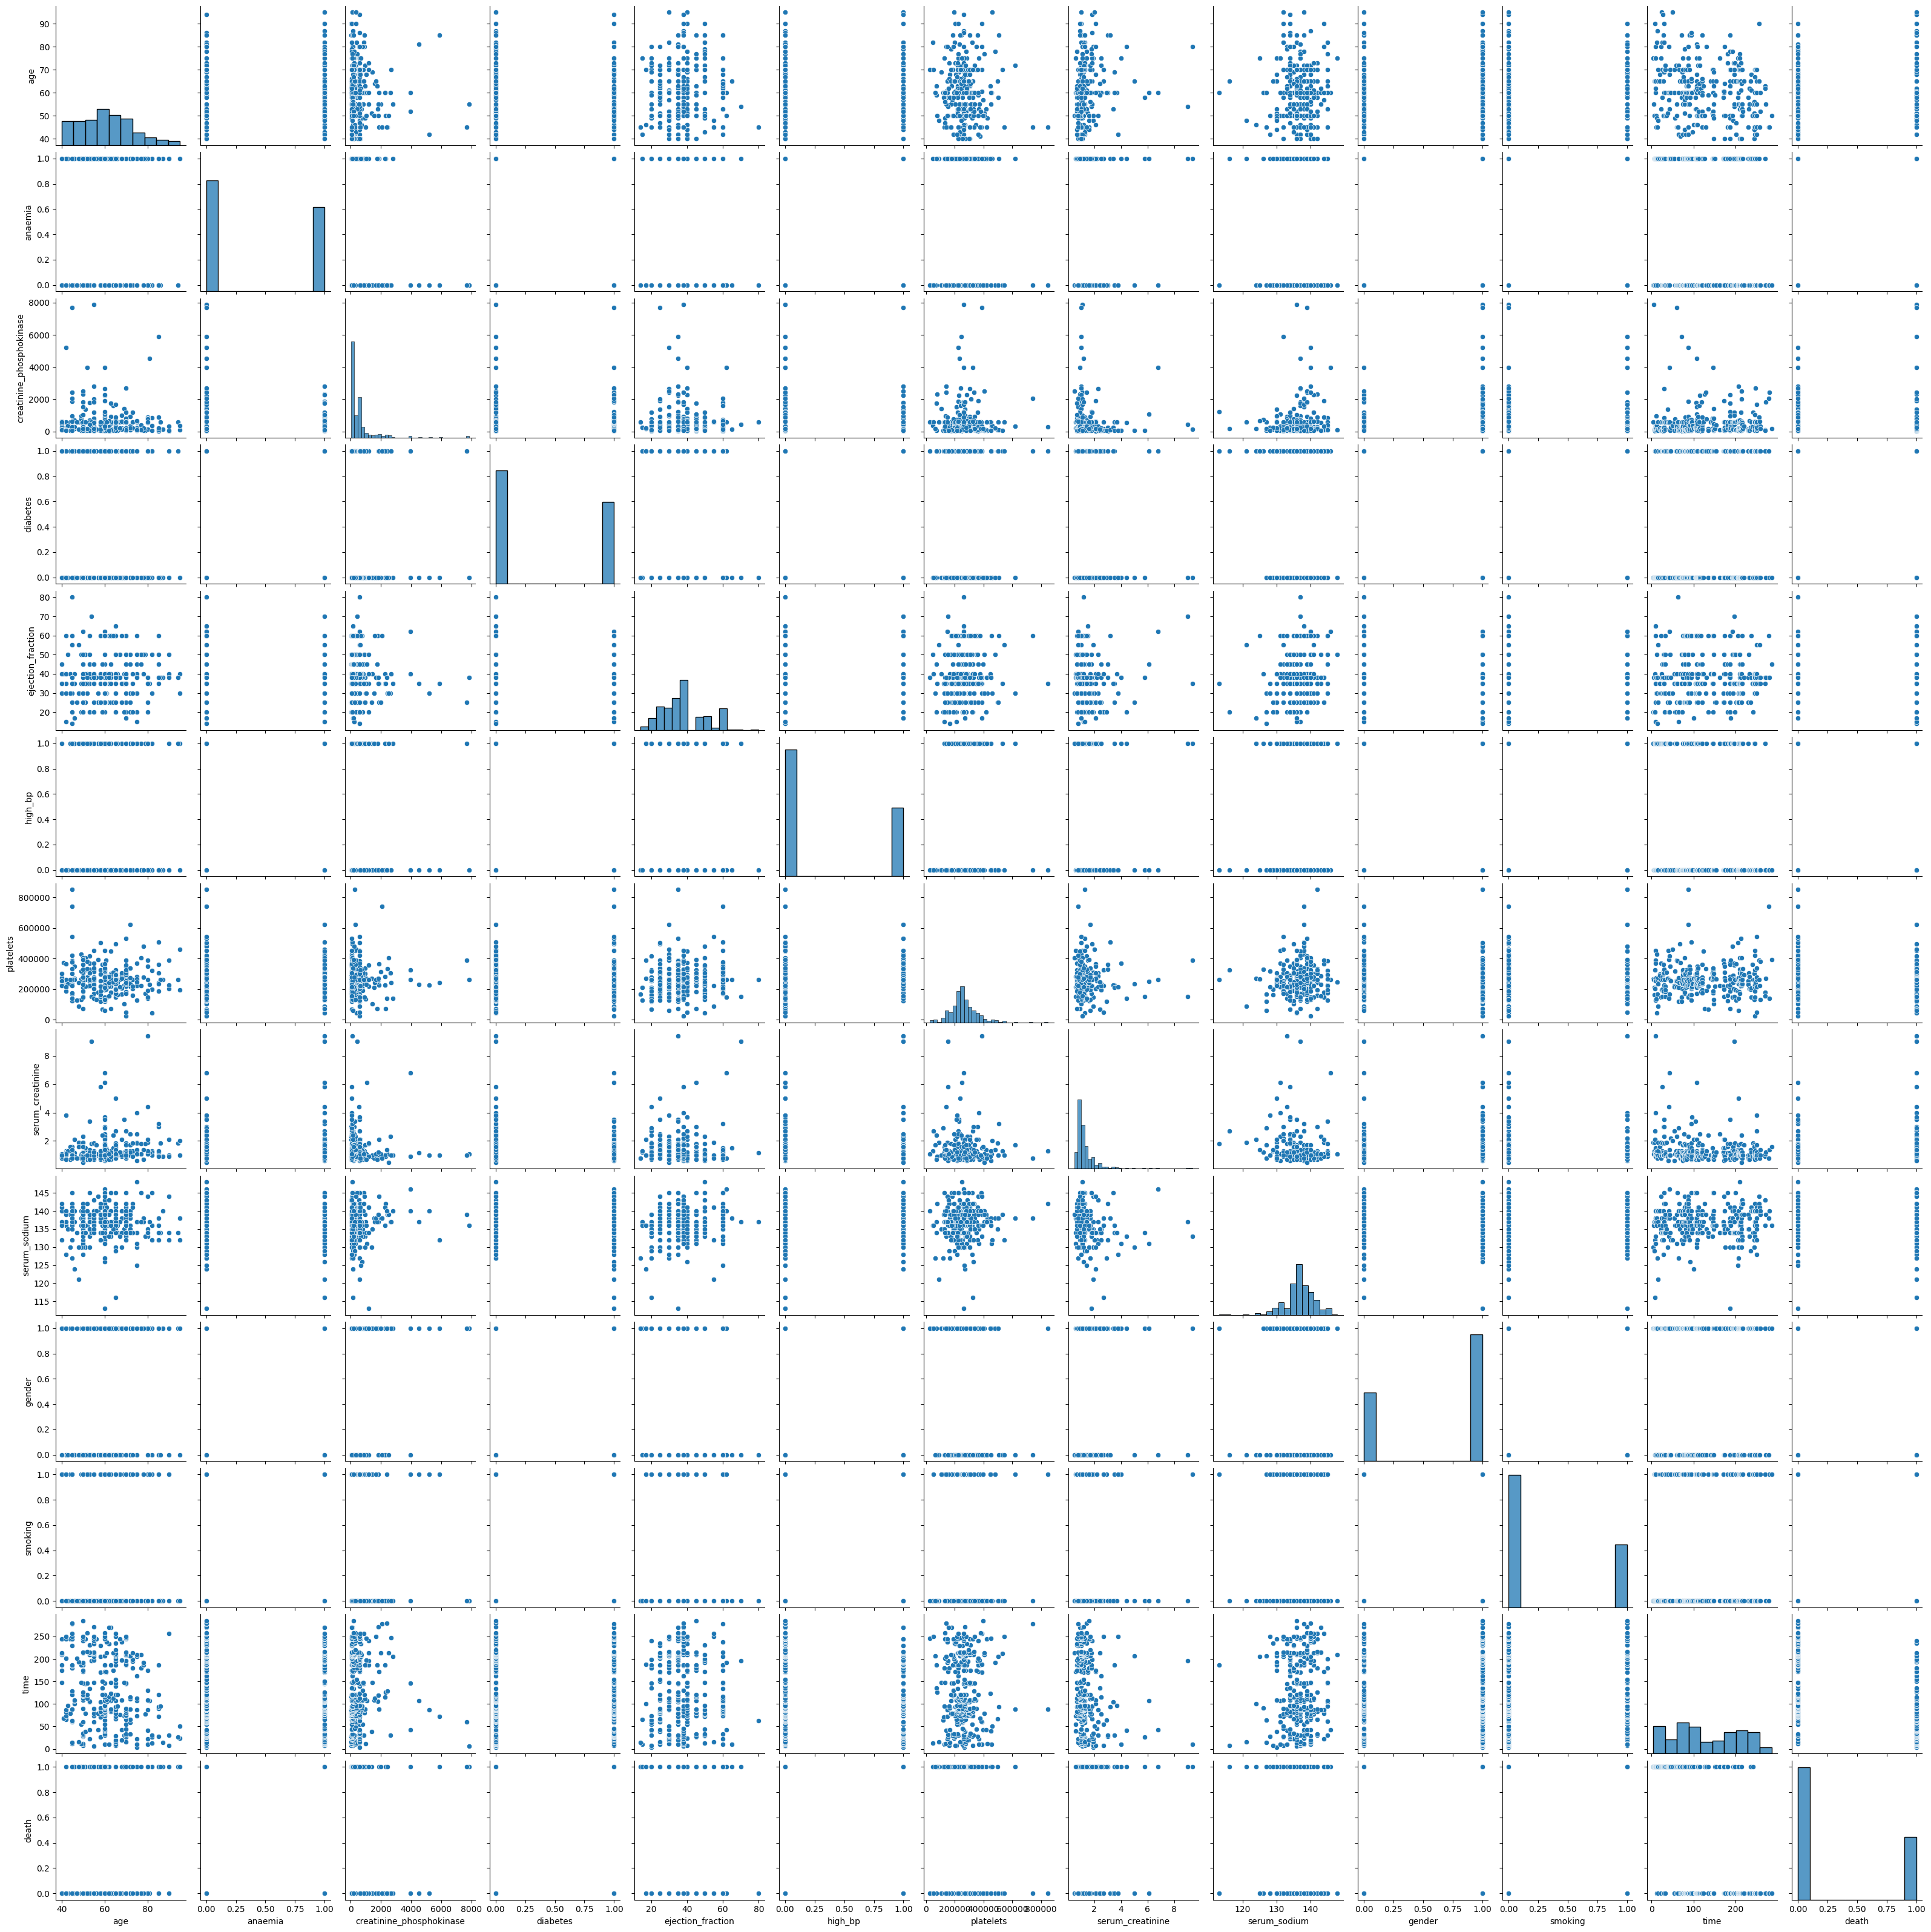

In [13]:
sns.pairplot(df)

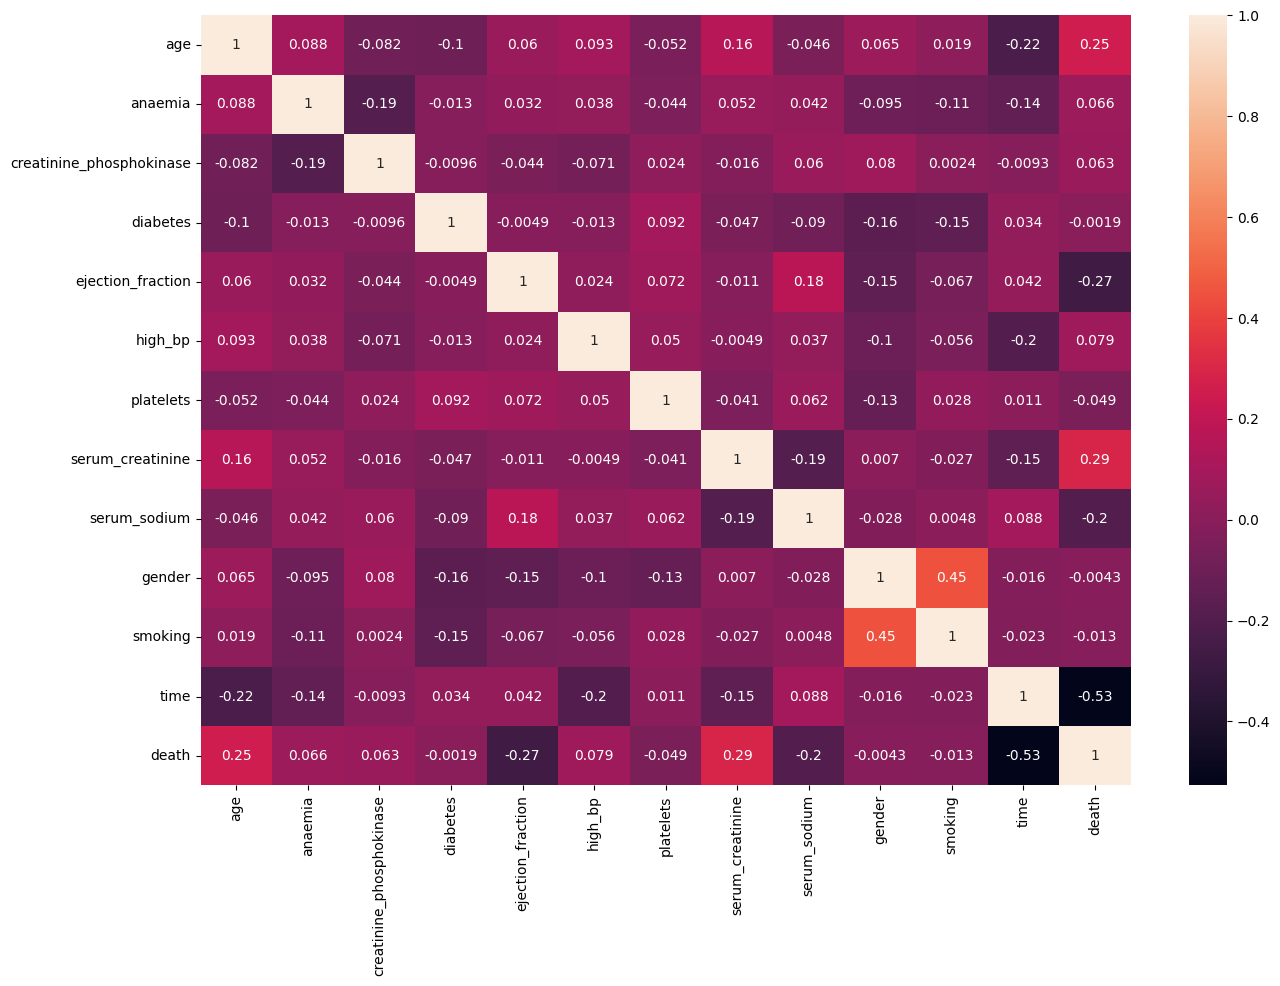

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

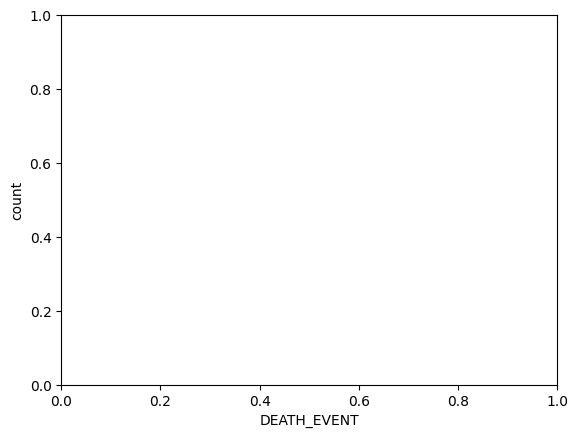

In [15]:
plt.xlabel('DEATH_EVENT')
plt.ylabel('count')
plt.show()

In [16]:
v=df.drop(['death'],axis=1)
vif=pd.DataFrame({'variables':v.columns})
vif['vif']=[variance_inflation_factor(v.values,i)
           for i in range(len(v.columns))]
vif

,variables,vif
0,age,29.114744
1,anaemia,1.909994
2,creatinine_phosphokinase,1.448473
3,diabetes,1.789419
4,ejection_fraction,12.081364
5,high_bp,1.646044
6,platelets,8.641813
7,serum_creatinine,2.919913
8,serum_sodium,59.151991
9,gender,3.795155


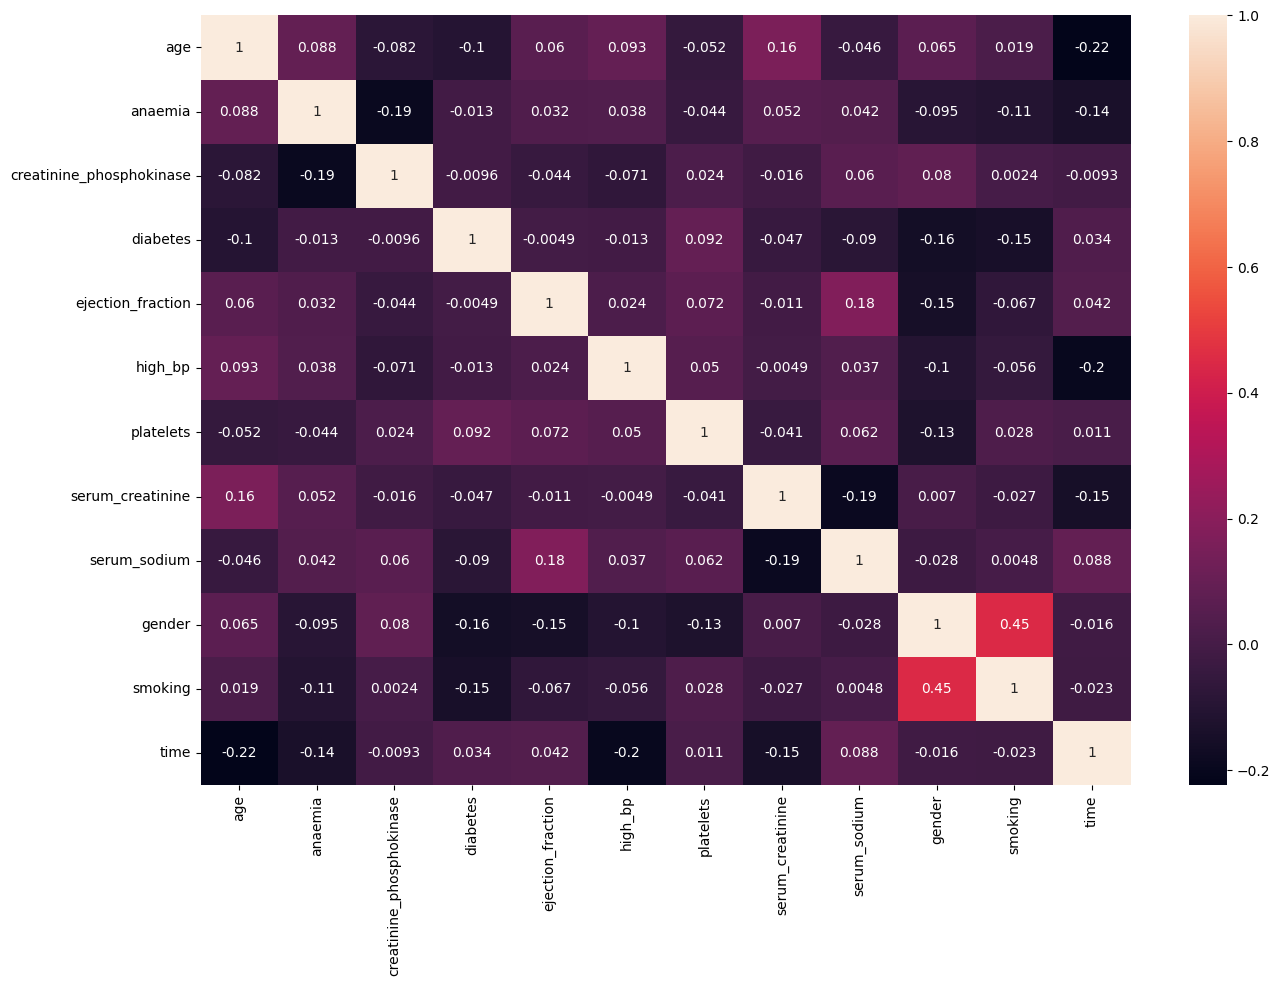

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap((df.drop(['death'],axis=1)).corr(),annot=True)
plt.show()

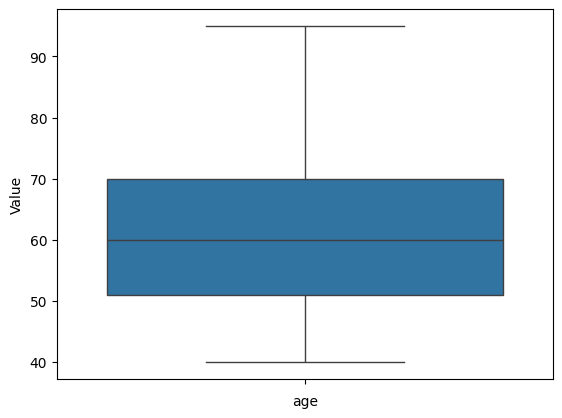

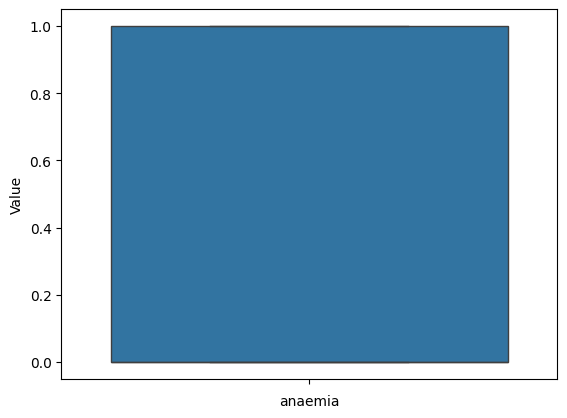

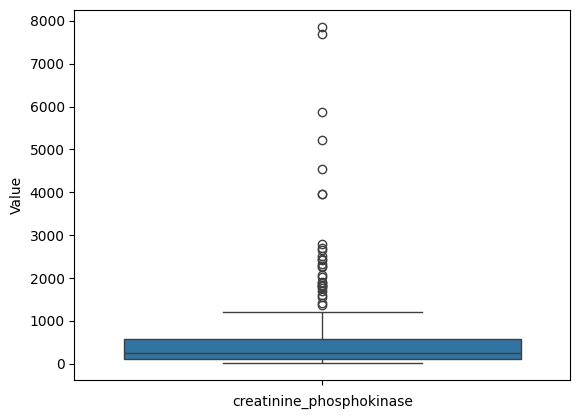

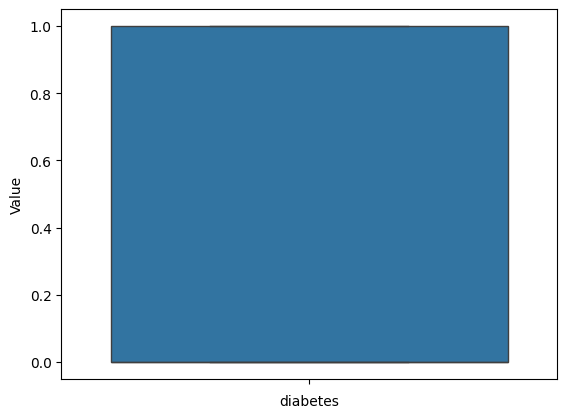

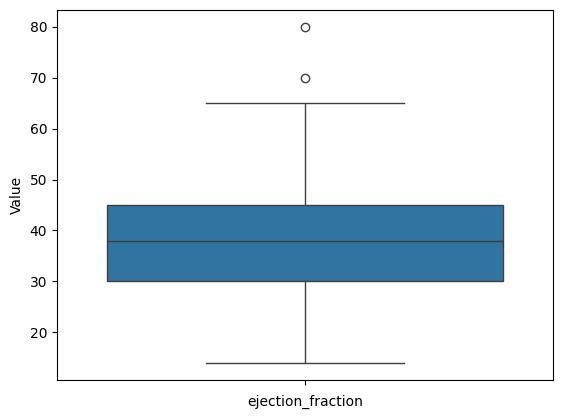

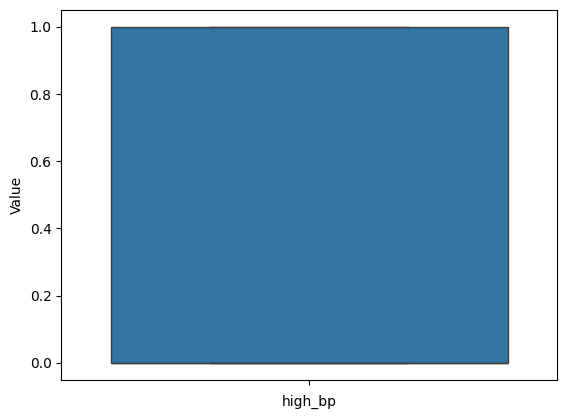

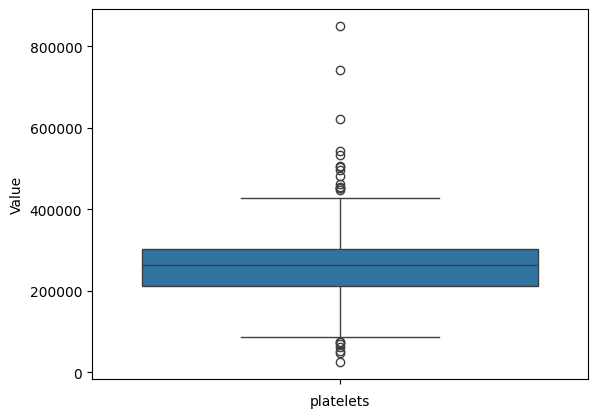

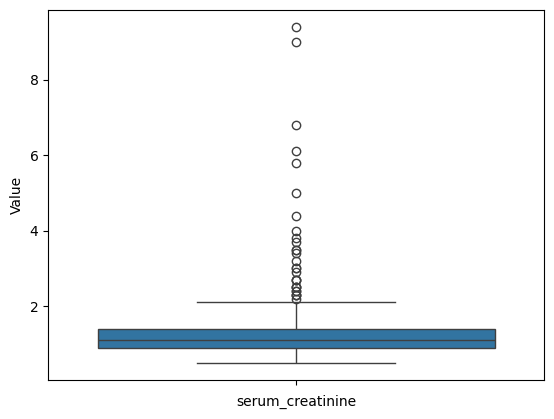

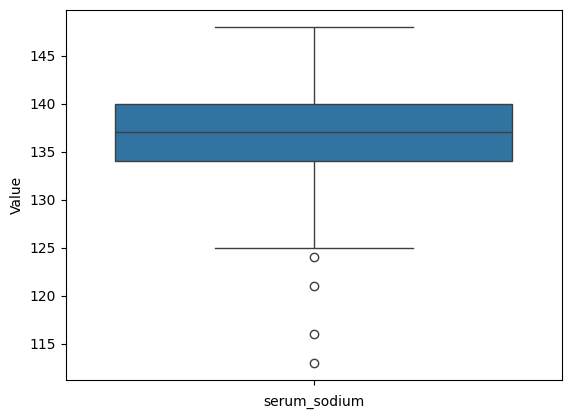

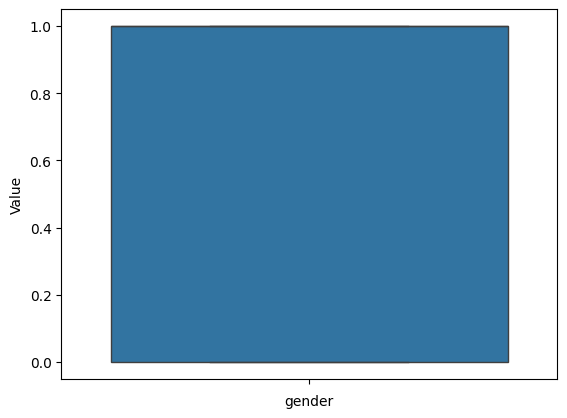

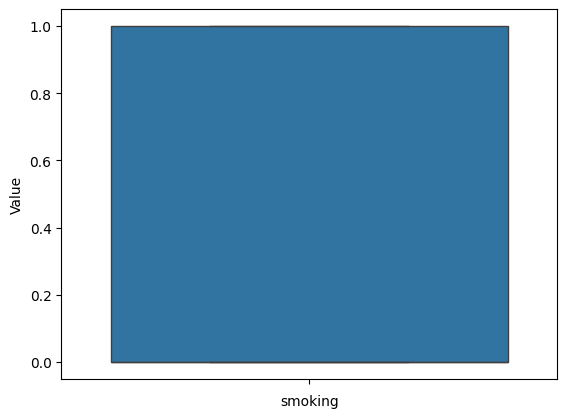

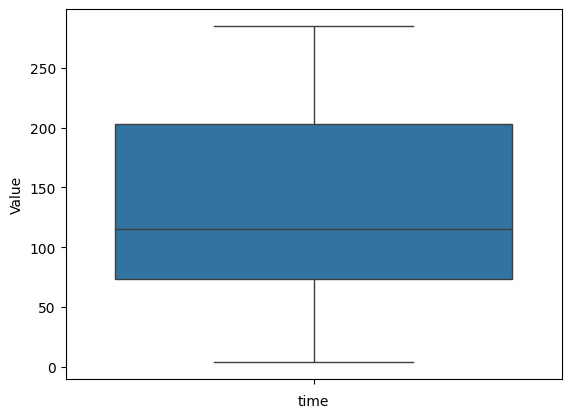

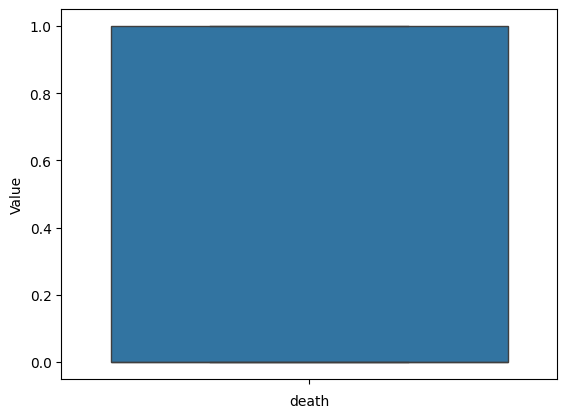

In [18]:
for o in df.columns:
    sns.boxplot(df[o])
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

In [19]:
X=df.drop(['death'],axis=1)
Y=df['death']

In [20]:
from imblearn.over_sampling import SMOTEN
smn=SMOTEN()
X_res,Y_res=smn.fit_resample(X,Y)
X_res.shape,Y_res.shape

((406, 12), (406,))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X_res)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y_res,train_size=0.8,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((324, 12), (82, 12), (324,), (82,))

In [23]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y_res,train_size=0.7,random_state=72)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((284, 12), (122, 12), (284,), (122,))

### LOGISTIC REGRESSION

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_pre=log.predict(x_test)

In [26]:
log.score(x_test,y_test)

0.9024390243902439

In [27]:
log.score(x_train,y_train)

0.8580246913580247

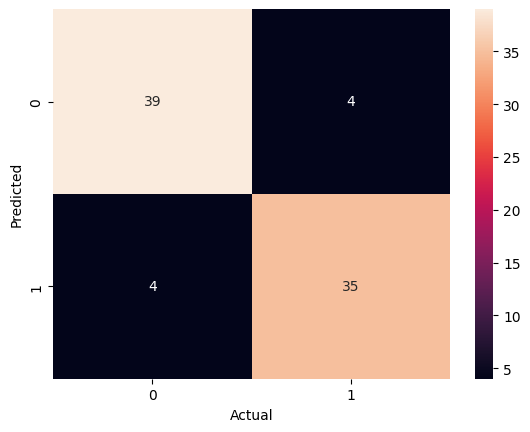

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.90      0.90      0.90        39

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



### DECISION TREE



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=25)
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)

In [31]:
dt.score(x_test,y_test)

0.9146341463414634

In [32]:
dt.score(x_train,y_train)

1.0

### GRID SEARCH CV

In [33]:
grid={'criterion':['entropy','gini'],
     'splitter':['best','random'],
     'min_samples_split':range(2,6,1),
     'min_samples_leaf':range(1,5,1),
     'max_depth':range(1,8),
     'ccp_alpha':np.random.rand(20)}

In [34]:
gscv=GridSearchCV(estimator=dt,param_grid=grid,cv=10,n_jobs=1)
gscv.fit(x_train,y_train)
gscv.best_params_

{'ccp_alpha': np.float64(0.024571399211968492),
 'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [35]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best',min_samples_leaf=1,min_samples_split=3,
                          ccp_alpha= 0.025918935539497867,random_state=25)
dt1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,25
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pre_dt1=dt1.predict(x_test)

In [37]:
dt1.score(x_test,y_test)

0.9146341463414634

In [38]:
dt1.score(x_train,y_train)

0.8734567901234568

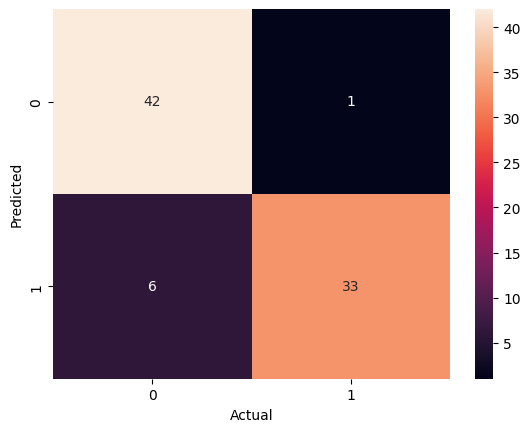

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pre_dt1),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [40]:
print(classification_report(y_test,y_pre_dt1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.97      0.85      0.90        39

    accuracy                           0.91        82
   macro avg       0.92      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



### RANDOM FOREST


In [41]:
from sklearn.ensemble import RandomForestClassifier
lis=[50,55,45,60,65,45,69,66,70,75,80,88,85,92,90,95,99]
for r in lis:
    ran1=RandomForestClassifier(n_estimators=r,random_state=11)
    ran1.fit(x_train,y_train)
    y_pre_r=ran1.predict(x_test)
    print('for n_estimetor = ',r,'the accuracy is = '+str(accuracy_score(y_test,y_pre_r)))

for n_estimetor =  50 the accuracy is = 0.9390243902439024
for n_estimetor =  55 the accuracy is = 0.9512195121951219
for n_estimetor =  45 the accuracy is = 0.9390243902439024
for n_estimetor =  60 the accuracy is = 0.9512195121951219
for n_estimetor =  65 the accuracy is = 0.9512195121951219
for n_estimetor =  45 the accuracy is = 0.9390243902439024
for n_estimetor =  69 the accuracy is = 0.9512195121951219
for n_estimetor =  66 the accuracy is = 0.9512195121951219
for n_estimetor =  70 the accuracy is = 0.9512195121951219
for n_estimetor =  75 the accuracy is = 0.9512195121951219
for n_estimetor =  80 the accuracy is = 0.9512195121951219
for n_estimetor =  88 the accuracy is = 0.9512195121951219
for n_estimetor =  85 the accuracy is = 0.9512195121951219
for n_estimetor =  92 the accuracy is = 0.9512195121951219
for n_estimetor =  90 the accuracy is = 0.9512195121951219
for n_estimetor =  95 the accuracy is = 0.9512195121951219
for n_estimetor =  99 the accuracy is = 0.95121951219512

In [42]:
model=RandomForestClassifier(n_estimators=55,random_state=11)
model.fit(x_train,y_train)

,n_estimators,55
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pre_rf=model.predict(x_test)

In [44]:
model.score(x_test,y_test)

0.9512195121951219

In [45]:
model.score(x_train,y_train)

1.0

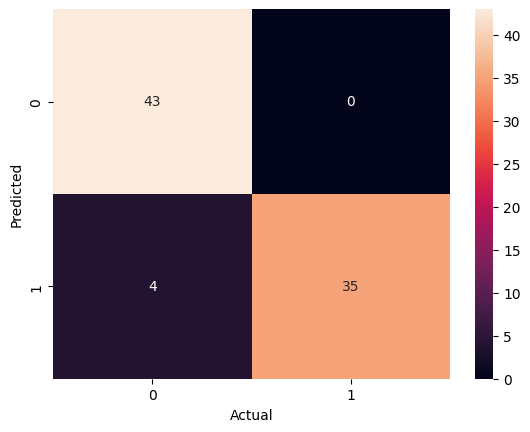

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pre_rf),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [47]:
print(classification_report(y_test,y_pre_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.90      0.95        39

    accuracy                           0.95        82
   macro avg       0.96      0.95      0.95        82
weighted avg       0.96      0.95      0.95        82



In [49]:
import joblib
joblib.dump(model, 'heart_failure_model.pikel')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
import streamlit as st
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
model=joblib.load('heart_failure_model.pikel')
scaler=joblib.load('scaler.pkl')
st.title('Heart failure Prediction app')

# --- Input sliders / dropdowns ---
age = st.slider("Age (years)", 20, 100, 60)
anaemia = st.selectbox("Anaemia (0 = No, 1 = Yes)", [0, 1], index=0)
creatinine_phosphokinase = st.slider("Creatinine Phosphokinase (U/L)", 0, 8000, 582)
diabetes = st.selectbox("Diabetes (0 = No, 1 = Yes)", [0, 1], index=0)
ejection_fraction = st.slider("Ejection Fraction (%)", 10, 80, 35)
high_blood_pressure = st.selectbox("High Blood Pressure (0 = No, 1 = Yes)", [0, 1], index=0)
platelets = st.slider("Platelets (kiloplatelets/mL)", 100000, 800000, 263358, step=1000)
serum_creatinine = st.slider("Serum Creatinine (mg/dL)", 0, 10, 1)
serum_sodium = st.slider("Serum Sodium (mEq/L)", 100, 150, 137)
sex = st.selectbox("Sex (0 = Female, 1 = Male)", [0, 1], index=1)
smoking = st.selectbox("Smoking (0 = No, 1 = Yes)", [0, 1], index=0)
time = st.slider("Follow-up Time (days)", 1, 300, 130)

# Put inputs in correct order (same as training)
input_data = np.array([[
    age,
    anaemia,
    creatinine_phosphokinase,
    diabetes,
    ejection_fraction,
    high_blood_pressure,
    platelets,
    serum_creatinine,
    serum_sodium,
    sex,
    smoking,
    time
]])

# Scale inputs
input_scaled = scaler.transform(input_data)

# Prediction
if st.button("Predict"):
    prob = model.predict_proba(input_scaled)[0][1]
    st.write(f"### Risk Probability: {prob:.2%}")
    if prob >= 0.5:
        st.error("⚠️ High risk of heart failure")
    else:
        st.success("✅ Low risk of heart failure")
